In [1]:
month=[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
def change( tmp):
    ans=[]
    p=0
    for ele in tmp:
        l=[]
        t=ele[0].split('/')
        l.insert(0,0)
        l[0]+=int(t[1])
        x=int(t[0])-1
        for j in range(x):
            l[0]+=month[j]
        x=x+1
        y=int(t[2])
        if(x<=2):
            y=y-1
        l[0]+=(y//4 - y//100 + y//400)*365
        l[0]-=177000
        #print(l[0])
        ans.insert(p,l)
        p+=1
    return ans

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("StockPrice.csv")
X=data.iloc[:,0:1]
Y=data.iloc[:,2:3]
X=X.values.tolist()
Y=Y.to_numpy(copy='True')
Y=np.reshape(Y,(1,1692))
Y=Y.tolist()[0]
X=change(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xtmp = scaler.transform(X)

In [3]:
#using SVR Linear
from sklearn import svm
clf1=svm.SVR(kernel='linear',gamma='auto')
clf1.fit(Xtmp,Y)
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='red')
plt.plot(X,clf1.predict(Xtmp),color='black')
plt.show()

<Figure size 640x480 with 1 Axes>

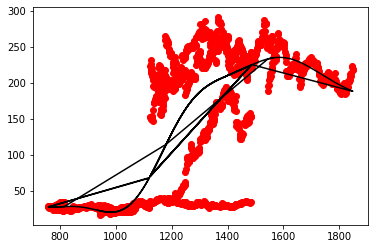

In [4]:
#using SVR rbf
from sklearn import svm
clf2=svm.SVR(kernel='rbf',gamma='auto',C=10)
clf2.fit(Xtmp,Y)
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='red')
plt.plot(X,clf2.predict(Xtmp),color='black')
plt.show()

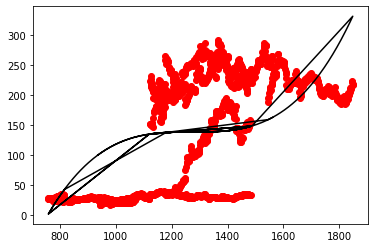

In [5]:
#using SVR poly
from sklearn import svm
clf3=svm.SVR(kernel='poly',gamma='auto',degree=3,C=1)
clf3.fit(Xtmp,Y)
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='red')
plt.plot(X,clf3.predict(Xtmp),color='black')
plt.show()

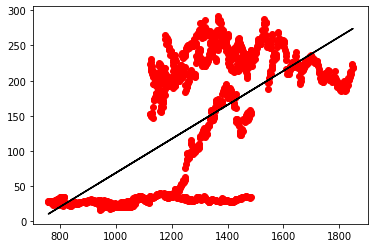

In [6]:
#Using Stoschastic Gradient Descent
from sklearn import linear_model
clf4 = linear_model.SGDRegressor(max_iter=100, tol=1e-3).fit(Xtmp,Y)
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='red')
plt.plot(X,clf4.predict(Xtmp),color='black')
plt.show()

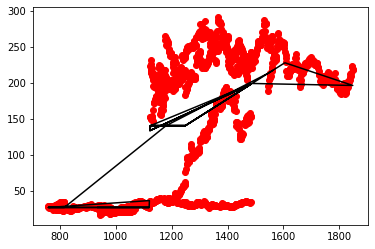

In [7]:
#using Neural Networks
from sklearn.neural_network import MLPRegressor
clf5= MLPRegressor(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(5,2), random_state=1)
clf5.fit(Xtmp,Y)
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='red')
plt.plot(X,clf5.predict(Xtmp),color='black')
plt.show()